In [1]:
import math

import awkward as ak
import hist
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import vector

print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
!ls -alh /pbs/throng/training/nantes-m2-rps-exp/data/*291263*

uproot version 5.5.1
awkward version 2.7.2
numpy version 2.0.2
matplotlib version 3.9.0
hist version 2.8.0
vector version 1.5.2
-rwxrwxr-x 1 2830 training 414M Aug 30  2023 /pbs/throng/training/nantes-m2-rps-exp/data/run291263.data.root
-rwxrwxr-x 1 2830 training  26M Aug 30  2023 /pbs/throng/training/nantes-m2-rps-exp/data/run291263.mc.root


In [2]:
file = uproot.open("/pbs/throng/training/nantes-m2-rps-exp/data/run291263.data.root")
file.keys()

['eventsTree;1']

In [118]:
events = file["eventsTree"]

m = events.arrays(
    ["nMuons", "Muon_Px", "Muon_Py", "Muon_Pz", "Muon_Charge", "Muon_E","isCMUL","zVtx","Muon_matchedTrgThreshold","isCMSH"],
    how="zip",
)
print(len(m))
print(m[2].to_list())

4982352
{'nMuons': 0, 'isCMUL': False, 'zVtx': -6.284543037414551, 'isCMSH': False, 'Muon': []}


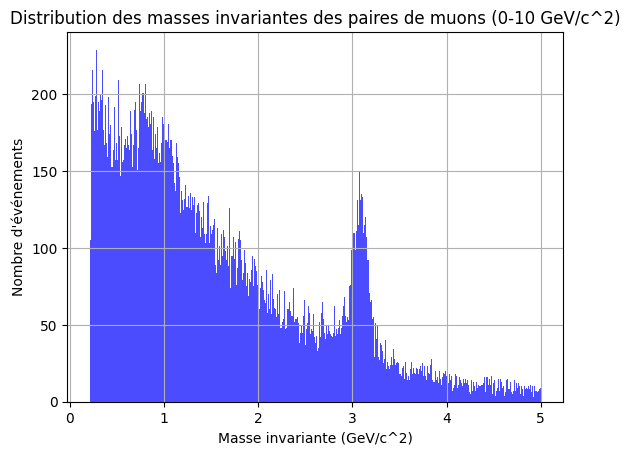

In [120]:
import awkward as ak
import vector

# Filtrer les événements avec nMuons == 2 et isCMUL == True
filtered_events = m[(m.nMuons == 2) & (m.isCMUL)&(abs(m.zVtx)<10)&(m.isCMSH)]
# Initialiser les vecteurs à partir des données des muons
muon_vectors = ak.zip({
    "px": filtered_events.Muon.Px,
    "py": filtered_events.Muon.Py,
    "pz": filtered_events.Muon.Pz,
    "E": filtered_events.Muon.E
}, with_name="Momentum4D")

# Calculer les masses invariantes pour chaque paire de muons dans chaque événement
invariant_masses = ak.combinations(muon_vectors, 2, fields=["muon1", "muon2"])
masses = (invariant_masses.muon1 + invariant_masses.muon2).mass

# Créer un histogramme des valeurs de la masse
flattened_masses = ak.flatten(masses)  # Aplatir les données pour l'histogramme
filtered_masses = flattened_masses[(flattened_masses >= 0) & (flattened_masses <= 5)]  # Filtrer les masses entre 0 et 10
plt.hist(filtered_masses, bins=500, color='blue', alpha=0.7)
plt.xlabel('Masse invariante (GeV/c^2)')
plt.ylabel("Nombre d'événements")
plt.title('Distribution des masses invariantes des paires de muons (0-10 GeV/c^2)')
plt.grid(True)
plt.show()